In [1]:
import numpy as np
import scipy as sc
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Initialise parameters
S0 = 100.0     # initial stock price
K = 150.0      # strike price
tau = 1.0        # time to maturity in years
r = 0.06       # annual risk-free rate

# Heston dependent parameters
kappa = 3              # rate of mean reversion of variance under risk-neutral dynamics
theta = 0.20**2        # long-term mean of variance under risk-neutral dynamics
v0 = 0.20**2           # initial variance under risk-neutral dynamics
rho = 0.98              # correlation between returns and variances under risk-neutral dynamics
sigma = 0.2            # volatility of volatility
lambd = 0              # risk premium of variance

2*kappa*theta, ' > ',sigma**2

(0.24000000000000005, ' > ', 0.04000000000000001)

In [9]:
def heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    
    # constants
    a = kappa*theta
    b = kappa+lambd
    
    # common terms w.r.t phi
    rspi = rho*sigma*phi*1j
    
    # define d parameter given phi and b
    d = np.sqrt( (rspi - b)**2 + (phi*1j+phi**2)*sigma**2 )
    
    # define g parameter given phi, b and d
    g = (b-rspi+d)/(b-rspi-d)

    # calculate characteristic function by components
    exp1 = np.exp(r*phi*1j*tau)
    term2 = S0**(phi*1j) * ( (1-g*np.exp(d*tau))/(1-g) )**(-2*a/sigma**2)
    exp2 = np.exp(a*tau*(b-rspi+d)/sigma**2 + v0*(b-rspi+d)*( (1-np.exp(d*tau))/(1-g*np.exp(d*tau)) )/sigma**2)
    
    return exp1*term2*exp2

def heston_price_rec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    
    P, umax, N = 0, 100, 650
    dphi=umax/N #dphi is width
    for j in range(1,N):
        # rectangular integration
        phi = dphi * (2*j + 1)/2 # midpoint to calculate height
        numerator = heston_charfunc(phi-1j,*args) - K * heston_charfunc(phi,*args)
        denominator = 1j*phi*K**(1j*phi)
        
        P += dphi * numerator/denominator
        
    return np.real((S0 - K*np.exp(-r*tau))/2 + P/np.pi)


strikes = np.arange(60, 180, 1.0)
option_prices = heston_price_rec(S0, strikes, v0, kappa, theta, sigma, rho, lambd, tau, r)
#
# option_prices

Text(0.5, 1.0, 'Risk-neutral PDF, $f_\\mathbb{Q}(K, \\tau)$')

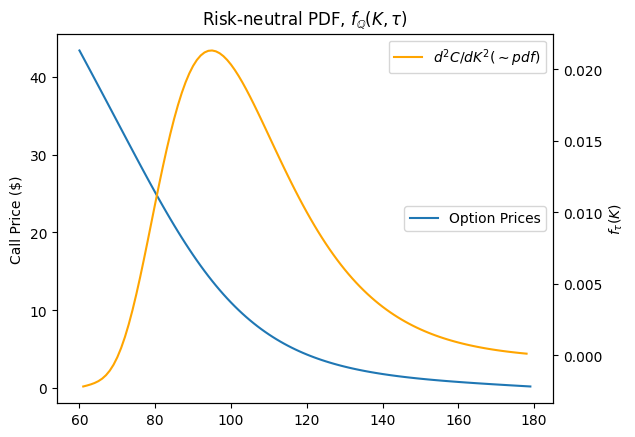

In [4]:
prices = pd.DataFrame([strikes, option_prices]).transpose()
prices.columns = ['strike', 'price']
prices['curvature'] = (-2 * prices['price'] + 
                       prices['price'].shift(1) +  
                       prices['price'].shift(-1)) / 1**2

# And plotting...
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylabel('Call Price ($)')
ax2 = ax.twinx()

ax.plot(strikes, option_prices, label='Option Prices')
ax2.plot(prices['strike'], prices['curvature'], label='$d^2C/dK^2 (\sim pdf)$', color='orange')

ax.legend(loc="center right")
ax2.legend(loc="upper right")
plt.xlabel('Strikes (K)')
plt.ylabel('$f_\\tau(K)$')
plt.title('Risk-neutral PDF, $f_\mathbb{Q}(K, \\tau)$')

In [8]:
# S0 = 100.0     # initial stock price
# K = 150.0      # strike price
# tau = 1.0        # time to maturity in years
# r = 0.06       # annual risk-free rate

# # Heston dependent parameters
# kappa = 3              # rate of mean reversion of variance under risk-neutral dynamics
# theta = 0.20**2        # long-term mean of variance under risk-neutral dynamics
# v0 = 0.20**2           # initial variance under risk-neutral dynamics
# rho = 0.98              # correlation between returns and variances under risk-neutral dynamics
# sigma = 0.2            # volatility of volatility
# lambd = 0              # risk premium of variance

# def heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):

#     # constants
#     a = kappa*theta
#     b = kappa+lambd
    
# #     # common terms w.r.t phi
#     rspi = rho*sigma*phi*1j
#     print(rspi)
    
# #     # define d parameter given phi and b
#     d = np.sqrt( (rspi - b)**2 + (phi*1j+phi**2)*sigma**2 )
    
# #     # define g parameter given phi, b and d
#     g = (b-rspi+d)/(b-rspi-d)

# #     # calculate characteristic function by components
#     exp1 = np.exp(r*phi*1j*tau)
#     term2 = S0**(phi*1j) * ( (1-g*np.exp(d*tau))/(1-g) )**(-2*a/sigma**2)
#     exp2 = np.exp(a*tau*(b-rspi+d)/sigma**2 + v0*(b-rspi+d)*( (1-np.exp(d*tau))/(1-g*np.exp(d*tau)) )/sigma**2)
    
#     return exp1*term2*exp2

# def heston_price_rec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
#     args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)    
#     P, umax, N = 0, 100, 650
#     dphi=umax/N #dphi is width
    
#     for j in range(1,N):
#         phi = dphi * (2*j + 1)/2 # midpoint to calculate height
#         numerator = heston_charfunc(phi-1j,*args) - K * heston_charfunc(phi,*args)
#         denominator = 1j*phi*K**(1j*phi)
#         P += dphi * numerator/denominator
        
#     return np.real((S0 - K*np.exp(-r*tau))/2 + P/np.pi)


# strikes = np.arange(60, 180, 1.0)
# option_prices = heston_price_rec(S0, strikes, v0, kappa, theta, sigma, rho, lambd, tau, r)


